In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_pickle, unpack_data
from mutual_information import (
    to_spikes_and_back,
    first_order_low_pass,
    score_pipeline,
    scoring_loop,
    plot_scores
)
sns.set()

### Setup

In [36]:
SUBJECT_IDX = 3
dataset = load_pickle(SUBJECT_IDX)
ppg, _, hr, activity, _= unpack_data(dataset)
ppg = ppg[:-(64)]

In [37]:
step_factor_list = np.concatenate([np.linspace(0, 1, 10), np.linspace(1, 10, 5)])

### Effect of spike number on mutual information

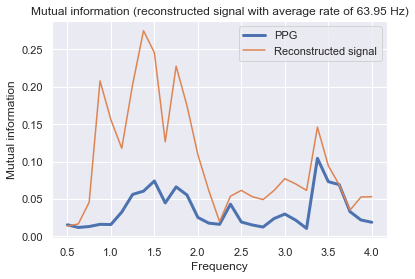

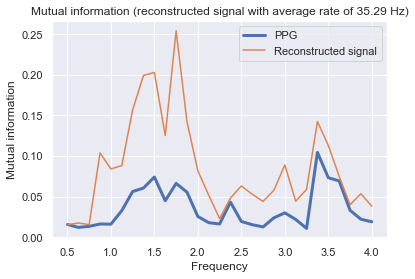

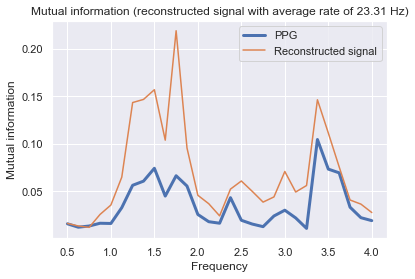

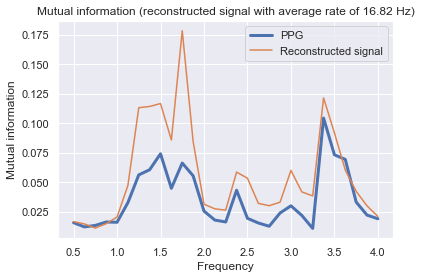

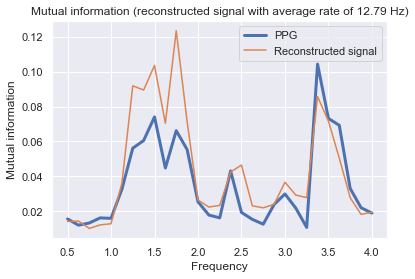

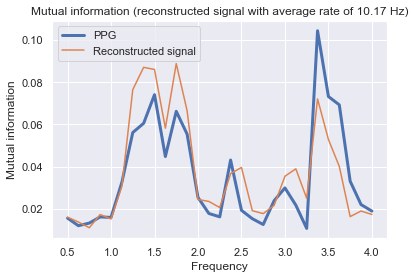

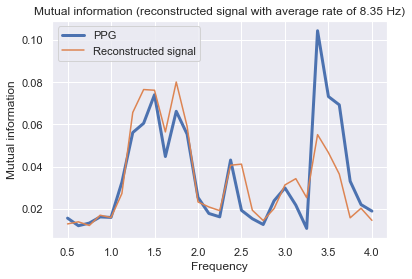

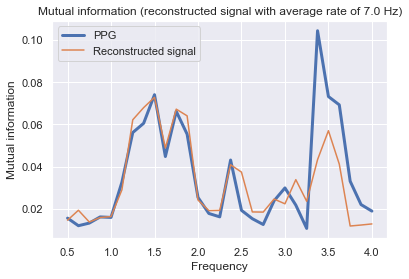

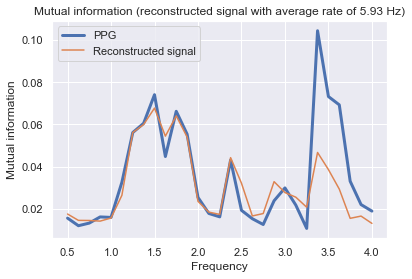

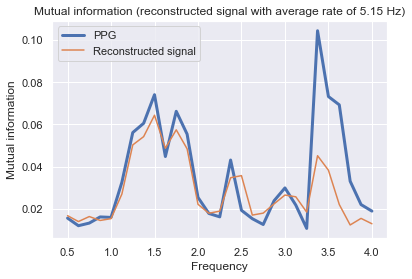

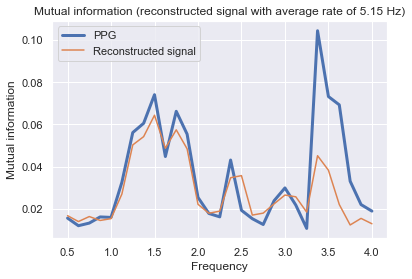

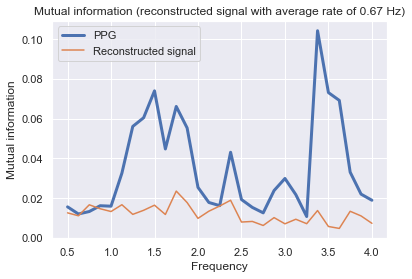

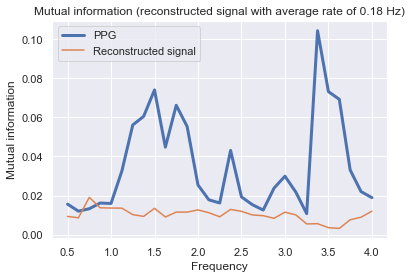

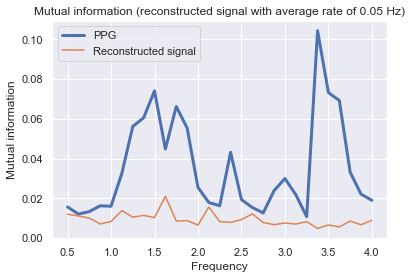

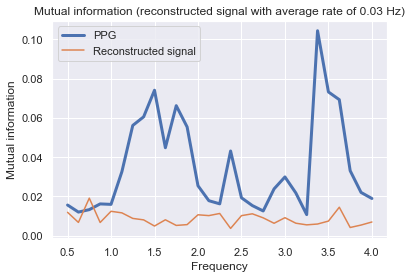

In [38]:
mutual_info_ppg, mutual_info_rec_list, rates_list = scoring_loop(
    [ppg], [hr],
    step_factor_list=step_factor_list,
    plot_detailed=True,
    evaluation_method='mutual_info'
)

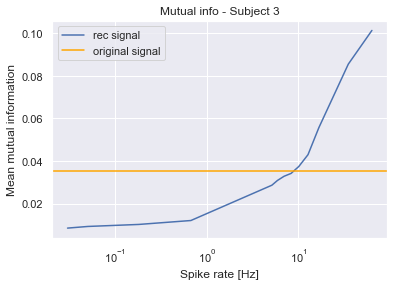

In [39]:
plot_scores(mutual_info_ppg, mutual_info_rec_list, rates_list, 'Mean mutual information', SUBJECT_IDX, 'Mutual info')

### Effect of spikes on mutual information (sklearn)

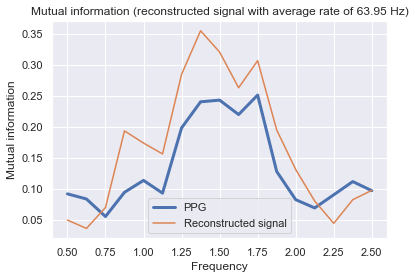

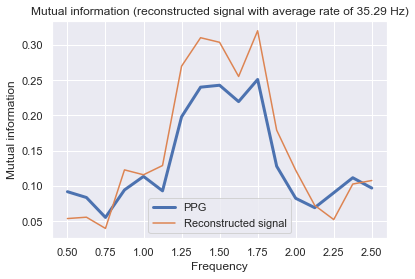

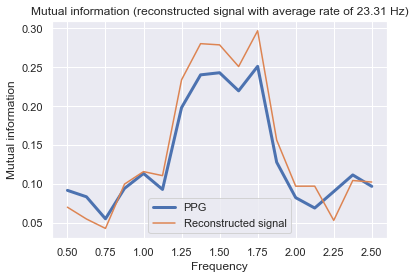

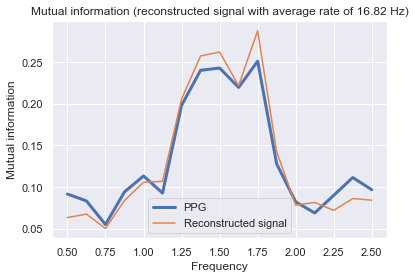

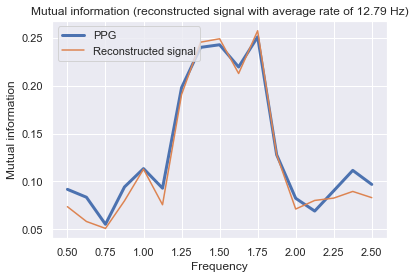

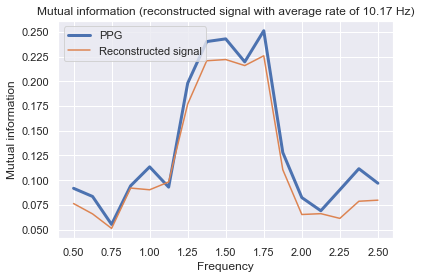

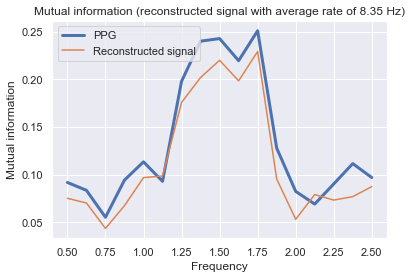

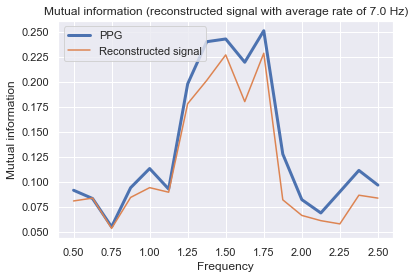

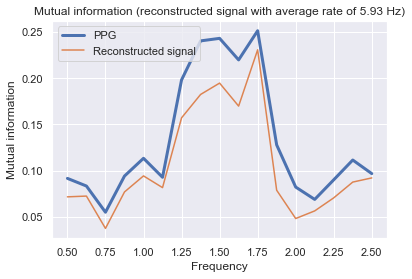

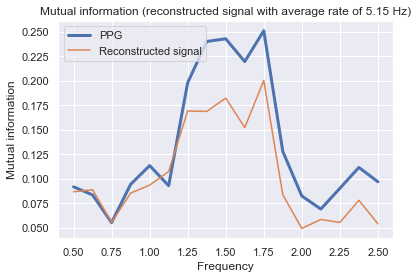

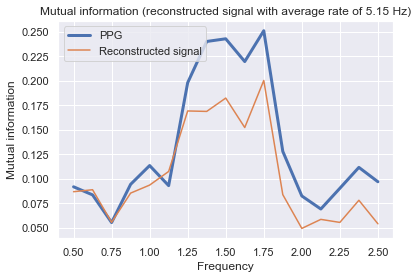

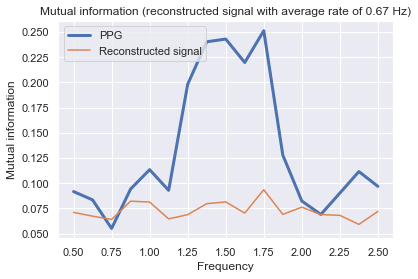

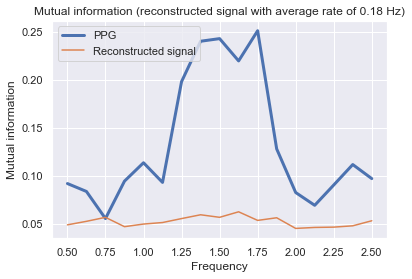

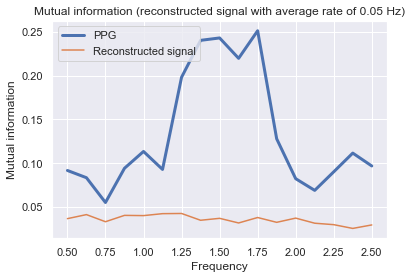

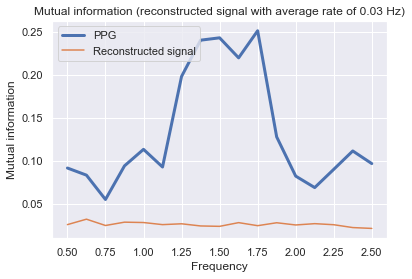

In [40]:
mutual_info_ppg, mutual_info_rec_list, rates_list = scoring_loop(
    [ppg], [hr],
    step_factor_list=step_factor_list,
    plot_detailed=True,
    n_neighbors=5,
    fmax=2.5,
    evaluation_method='mutual_info_sklearn'
)

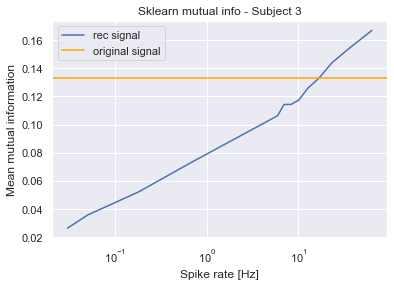

In [41]:
plot_scores(mutual_info_ppg, mutual_info_rec_list, rates_list, 'Mean mutual information', SUBJECT_IDX, 'Sklearn mutual info')

### Effect of spike number on linear regression score

#### In-sample

In [23]:
score_ppg, score_rec_list, rates_list = scoring_loop(
    [ppg], [hr],
    step_factor_list=step_factor_list,
    evaluation_method='regression_insample'
)

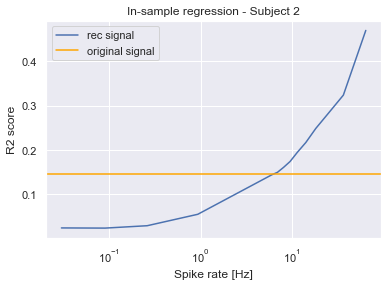

In [24]:
plot_scores(score_ppg, score_rec_list, rates_list, 'R2 score', SUBJECT_IDX, 'In-sample regression')

#### Cross-validated

In [25]:
score_ppg, score_rec_list, rates_list = scoring_loop(
    [ppg], [hr],
    step_factor_list=step_factor_list,
    evaluation_method='regression_cv',
    nperseg=1024
)

(-0.5, 1.0)

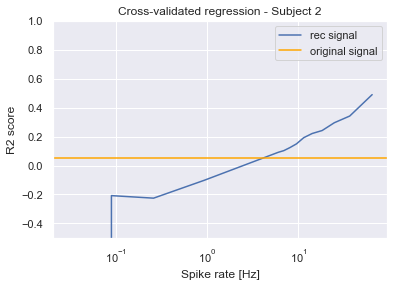

In [26]:
plot_scores(score_ppg, score_rec_list, rates_list, 'R2 score', SUBJECT_IDX, 'Cross-validated regression')
plt.ylim(-0.5, 1)